<a href="https://colab.research.google.com/github/CyberJuan55/GenderPredict/blob/master/GenderPredict00.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder, label_binarize
from sklearn.preprocessing import StandardScaler, RobustScaler, Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
from scipy import stats

urlTrain  = 'https://raw.githubusercontent.com/CyberJuan55/GenderPredict/master/Dataset/SpotifyFeatures.csv_train.csv'
urlFull = 'https://github.com/CyberJuan55/GenderPredict/blob/master/Dataset/SpotifyFeatures.csv'
urlNuevoDataSet = 'https://github.com/CyberJuan55/GenderPredict/blob/master/Dataset/genres_v2.csv'



df_train_original = pd.read_csv(urlTrain)

df_train = df_train_original.copy()


In [6]:
df_train.genre.unique()

array(['Opera', 'Reggaeton', 'Indie', 'Soundtrack', 'Hip-Hop', 'World',
       'Classical', 'Electronic', 'Reggae', 'Alternative', 'Ska', 'Movie',
       'Jazz', 'Rock', 'Country', 'R&B', 'Rap', 'Folk', 'Anime',
       "Children's Music", 'Children’s Music', 'Pop', 'Dance', 'Blues',
       'Comedy', 'Soul', 'A Capella'], dtype=object)

### Preprocesado de datos y visualizacion 

In [17]:
# Funcion para el preprocesamiento de datos
def preprocesado(df,out=False):


    df.dropna(axis=0, inplace=True)
    df.drop_duplicates

    if df.duplicated().sum() == 0:
        print('no hay datos duplicados')
    else:
        df.drop_duplicates
    if 'Unnamed: 0' in df.columns:
        df = df.drop(['Unnamed: 0'], axis=1)

    #df_train = df.drop(['Unnamed: 0'], axis=1)

    df = df.drop(['track_name','artist_name','track_id','time_signature'], axis=1)
    df['genre']= df['genre'].replace(["Children’s Music"],"Children's Music")

    indexNamesChildren = df[ df['genre'] == "Children's Music" ].index
    df.drop(indexNamesChildren , inplace=True)

    indexNamesAcapella = df[ df['genre'] == "A Capella"].index
    df.drop(indexNamesAcapella , inplace=True)
#-------------------------------------------------------------------------------
 

    #indexPOP = df[df.popularity==0].index
    #df.drop(indexPOP , inplace=True)

    #indexACO = df[df.acousticness < 0.02] .index
    #df.drop(indexACO , inplace=True)
    #indexACO1 = df[df.acousticness > 0.98] .index
    #df.drop(indexACO1 , inplace=True)

    #indexVAL = df[df.valence < 0.08] .index
    #df.drop(indexVAL , inplace=True)
    #indexVAL1 = df[df.valence > 0.9] .index
    #df.drop(indexVAL1 , inplace=True)
#-------------------------------------------------------------------------------

    cols_with_missing = [col for col in df.columns if df[col].isnull().any()] 
    faltanDatos = True
    if len(cols_with_missing)==0:
        faltanDatos= False
        print('no faltan valores') 
    if faltanDatos == True:
        print(cols_with_missing)
        df.dropna(axis=0, inplace=True)
#-------------------------------------------------------------------------------
    y = df['genre']

    if out == True:
        labelencoder = LabelEncoder()
        df["genre"] = labelencoder.fit_transform(df["genre"])

        df_train_genres = df
        generos=list(df_train['genre'].unique())

        b = []
        for i in generos:
            df=df_train_genres[df_train_genres["genre"]==i].drop(columns=["genre","mode","key"])
     
            z = np.abs(stats.zscore(df))
            a=np.where(z > 3)
            outliers=list(set(list(a[0])))
            ñ = [df.iloc[x,:].name for x in outliers]
            b = ñ + b
        df_train_genres.drop(b, axis = 0, inplace = True)

        df = df_train_genres
#-------------------------------------------------------------------------------
    
    X = df.drop(columns=['genre'])
#-------------------------------------------------------------------------------   
    return X,y 


In [18]:
df_train,y = preprocesado(df_train,out=False)

no hay datos duplicados
no faltan valores


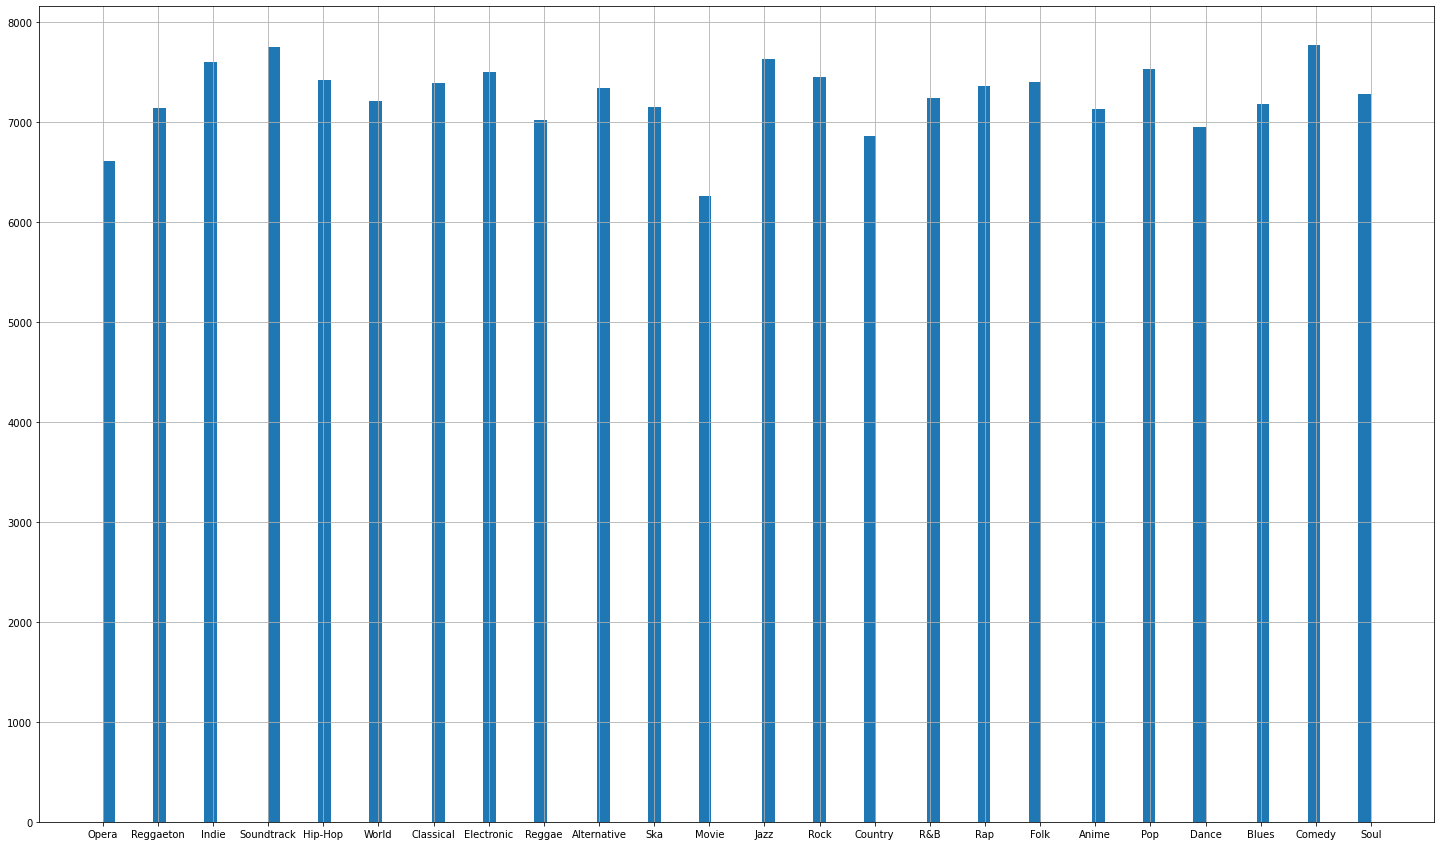

In [9]:
y.hist(bins=100, figsize=(25,15))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa267beb9d0>,
      dtype=object)

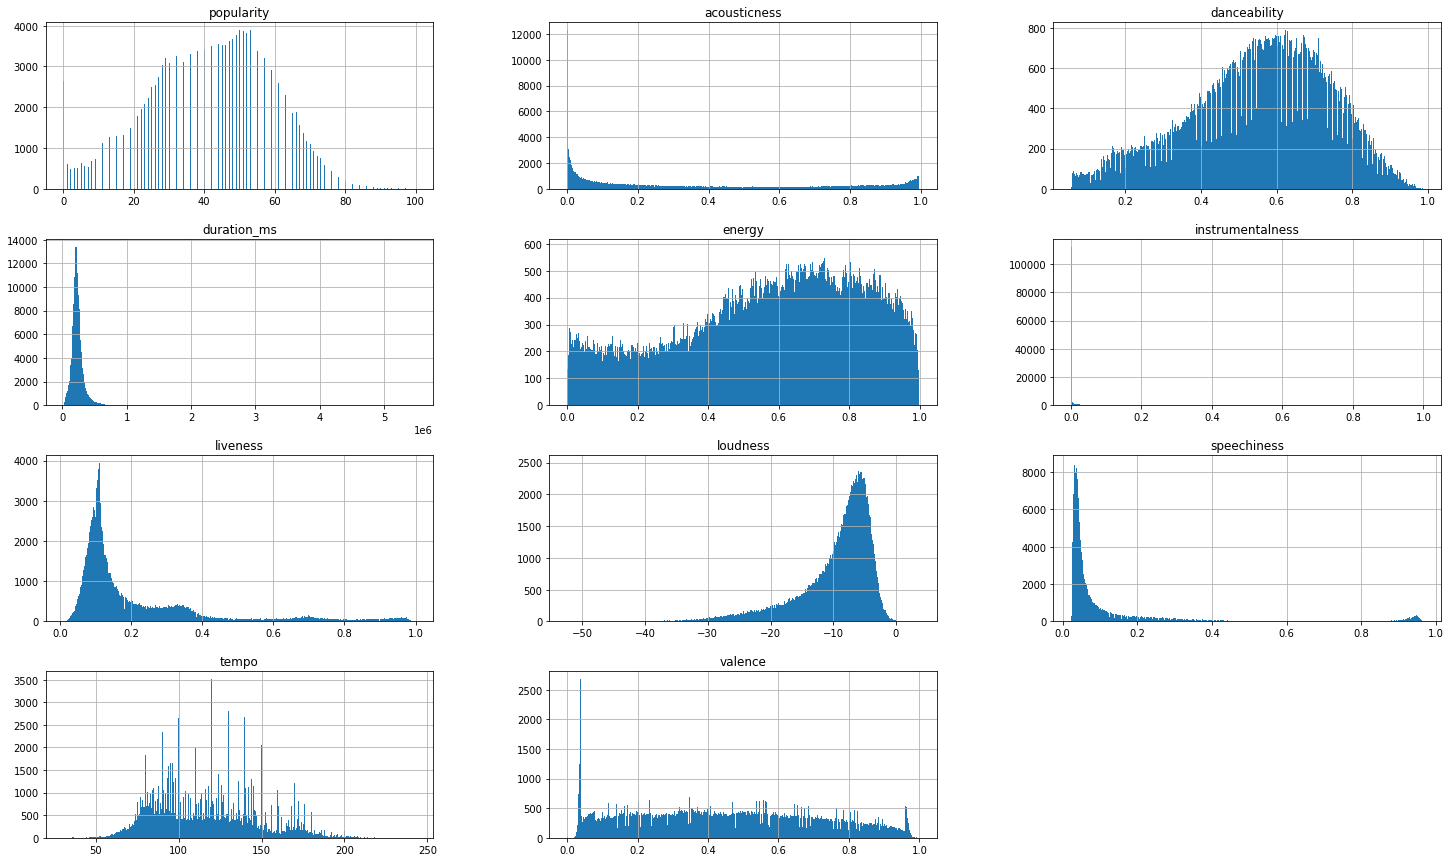

In [10]:
df_train.hist(bins=500, figsize=(25,15))

In [ ]:
#Borrar variables categoricas
df_train = df_train.drop(['mode',"key"], axis=1) 

In [31]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict
X_train_full, X_valid_full, y_train, y_valid = train_test_split(df_train, y, 
                                                                train_size=0.7, test_size=0.3,
                                                                random_state=42)

In [22]:
df_train_num = df_train.drop(['mode',"key"], axis=1) 

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

num_pipeline = Pipeline([
        #('mismax_scaler', MinMaxScaler()),
        #('standar_scaler', StandardScaler()),
        ('Robust_scaler', RobustScaler()),
        ('Normalize', Normalizer()),
    ])
#cat_attribs1 = ["key"]
#cat_attribs2 = ["mode"]
#cat_attribs3 = ["time_signature"]
num_attribs = list(df_train_num)

full_pipeline = ColumnTransformer([
        ('numerical', num_pipeline, num_attribs),                          
        #("cat", OrdinalEncoder(), cat_attribs1),
       # ("cat1", OrdinalEncoder(), cat_attribs2),
        #("cat3", OneHotEncoder(), cat_attribs3),
    ])

In [24]:
df_train_processed = full_pipeline.fit_transform(df_train)

In [25]:
df_train_processed

array([[-0.06515325,  0.04237354, -0.07200574, ..., -0.00762294,
         0.02125077, -0.0424443 ],
       [-0.37089263, -0.19340041,  0.64690575, ...,  0.37714776,
        -0.23783805,  0.20228519],
       [ 0.47770473,  0.04117845, -0.14754688, ..., -0.12386374,
        -0.6425014 , -0.48587303],
       ...,
       [ 0.50017314, -0.14654488,  0.06350768, ...,  0.27127866,
         0.17452367, -0.2471171 ],
       [ 0.42237614, -0.00766507,  0.19440762, ...,  0.51806598,
        -0.02177425,  0.47069039],
       [-0.02783214,  0.02417668, -0.07299644, ..., -0.00428393,
         0.03910191, -0.03413375]])

##PCA

In [26]:
a = pd.DataFrame(df_train_processed)

In [27]:
a

,0,1,2,3,4,5,6,7,8,9,10
0,-0.065153,0.042374,-0.072006,-0.047566,-0.065096,0.983189,-0.010421,-0.114869,-0.007623,0.021251,-0.042444
1,-0.370893,-0.193400,0.646906,0.233919,-0.010167,0.000523,0.273681,0.192609,0.377148,-0.237838,0.202285
2,0.477705,0.041178,-0.147547,0.119608,-0.114113,-0.000422,0.237936,-0.012958,-0.123864,-0.642501,-0.485873
3,0.021092,0.027407,-0.005927,-0.004983,0.001189,0.998601,-0.002802,-0.012325,-0.012175,-0.024872,-0.024749
4,-0.322419,0.240397,-0.183883,-0.142282,-0.236649,0.000369,0.754523,-0.286834,-0.015951,-0.256992,-0.101571
...,...,...,...,...,...,...,...,...,...,...,...
174227,-0.002879,0.054864,-0.029295,0.177524,0.066208,-0.000080,0.333986,0.031773,0.918201,-0.054872,-0.039556
174228,-0.278583,-0.166134,0.267868,0.106992,0.002685,0.238212,-0.082226,0.209340,0.672570,-0.460486,0.199638
174229,0.500173,-0.146545,0.063508,0.539117,0.223697,0.008470,0.447983,0.133237,0.271279,0.174524,-0.247117
174230,0.422376,-0.007665,0.194408,0.206841,-0.337425,-0.000557,-0.071684,-0.362701,0.518066,-0.021774,0.470690


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa25dc91f50>,
      dtype=object)

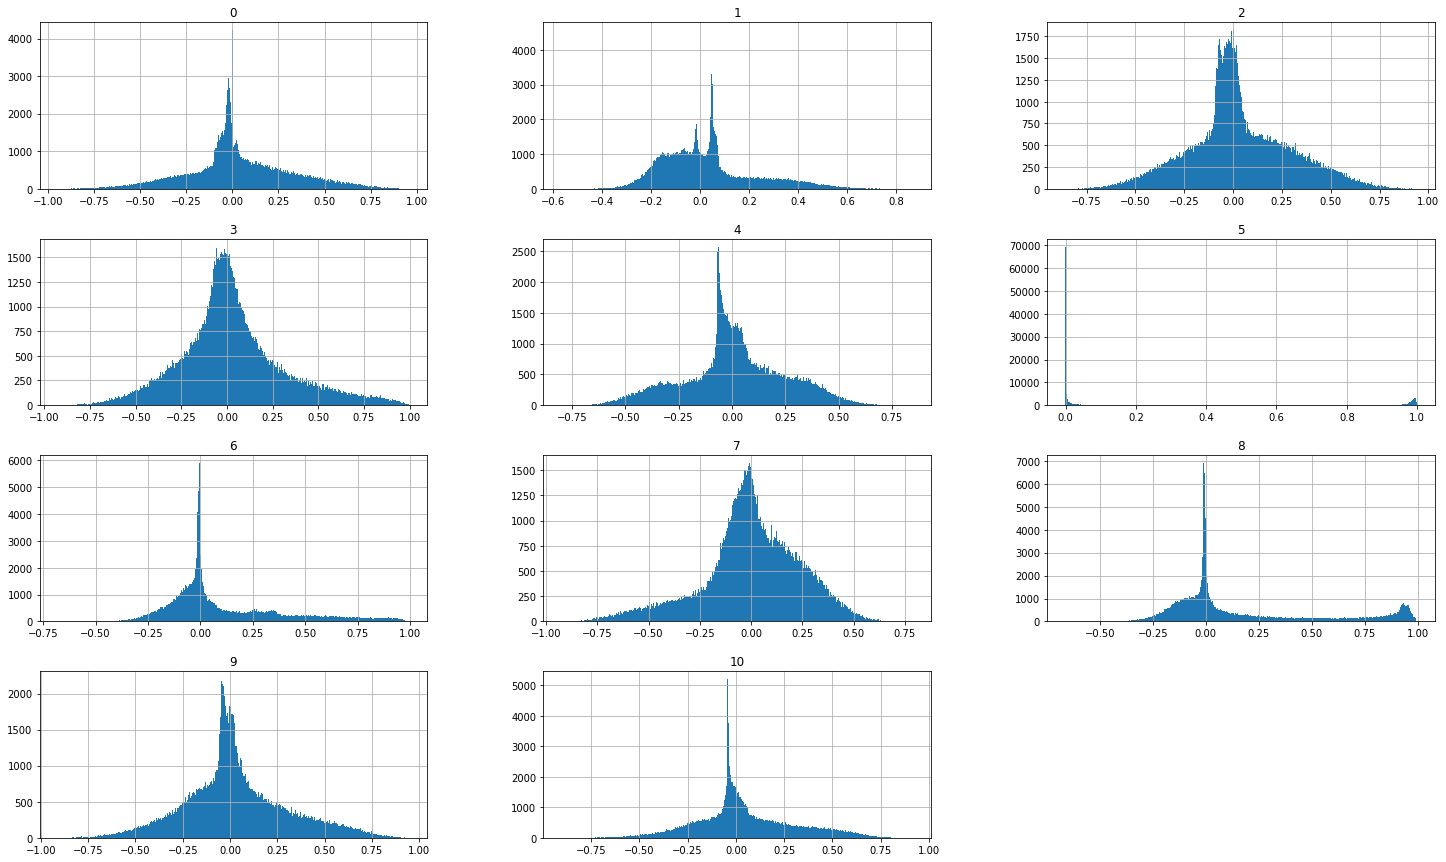

In [28]:
a.hist(bins=500, figsize=(25,15))

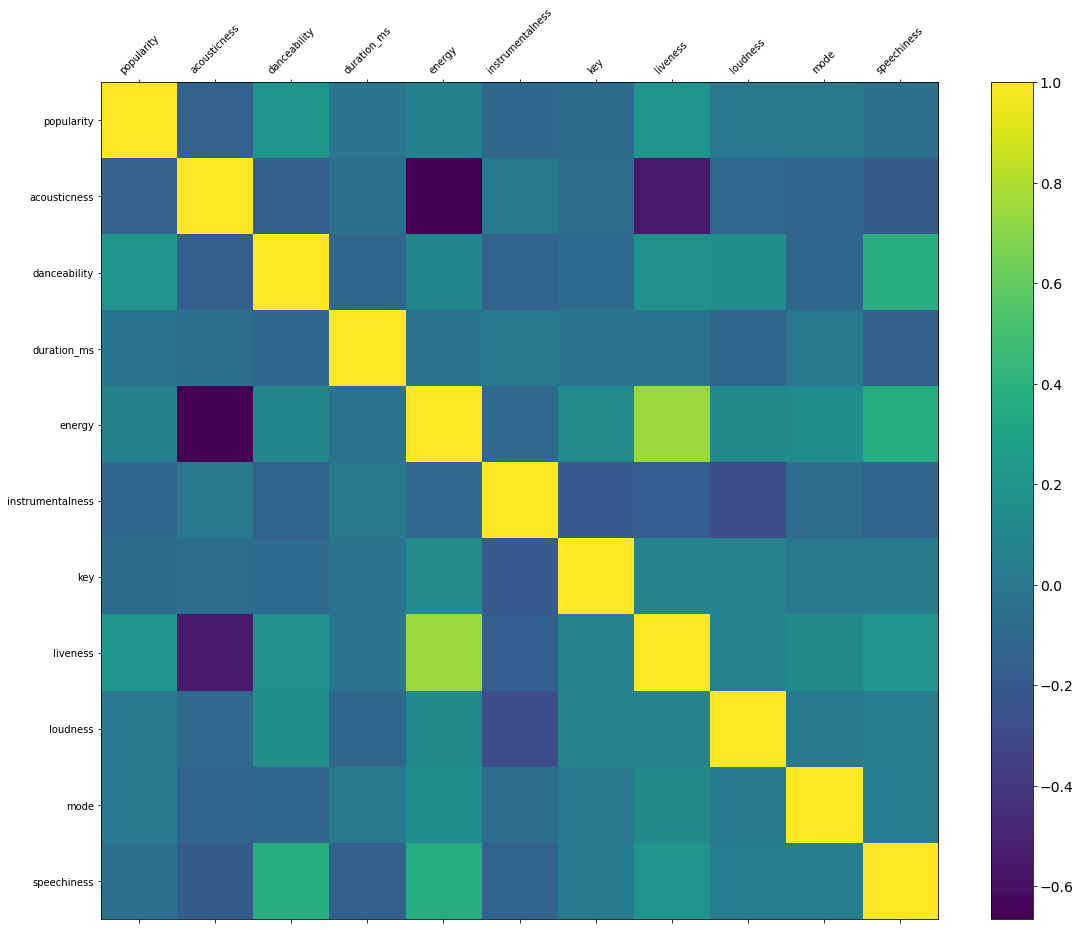

In [29]:
f = plt.figure(figsize=[19,15])
plt.matshow(a.corr(),fignum=f.number)
plt.xticks(range(a.shape[1]),df_train.columns,rotation=45)
plt.yticks(range(a.shape[1]),df_train.columns)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

In [ ]:
from sklearn.decomposition import PCA
dim=[]
var=[]
for comp in range(3, df_train_processed.shape[1]):
    dim.append(comp)
    pca = PCA(n_components= comp, random_state=42)
    pca.fit(df_train_processed)
    comp_check = pca.explained_variance_ratio_
    var.append(sum(comp_check))
    final_comp = comp
    if comp_check.sum() > 0.99:
        break

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
#n_components= 9, random_state=42

In [ ]:
pca.fit(a)


PCA()

In [ ]:
x_pca = pca.transform(a)

In [ ]:
print(x_pca.shape)
print(x_pca)

(42305, 10)
[[-0.33380312  0.07822701  0.01129328 ...  0.00890298 -0.06930656
   0.08029903]
 [-0.28551139 -0.15628886  0.44100296 ... -0.09345936  0.00905497
  -0.05125462]
 [-0.21579366 -0.3372649  -0.09037784 ... -0.36830464 -0.19230304
   0.07970531]
 ...
 [-0.15000819 -0.46825103 -0.16312943 ...  0.02365097  0.01886144
  -0.04602439]
 [-0.17858429 -0.03957168 -0.20115344 ...  0.00698641  0.11311407
   0.01727898]
 [-0.1547352  -0.39204401 -0.21304885 ... -0.08237663 -0.07794336
   0.08153472]]


Text(0.5, 0, 'Cantidad de componentes principales')

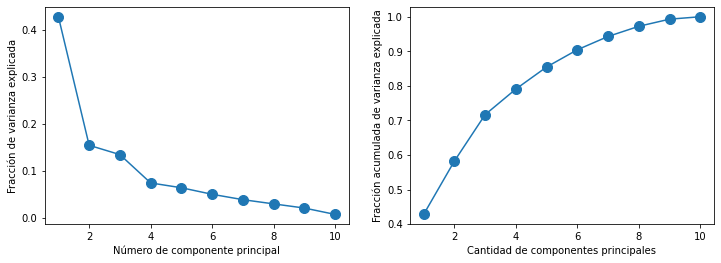

In [ ]:
# con .explained_variance_ratio_ vemos la fracción de información que aporta cada componente
evr = pca.explained_variance_ratio_

# Graficamos la fracción de varianza que aporta cada componente
# y la información acumulada
fig, ax = plt.subplots(1, 2, figsize = (12, 4))

ax[0].plot(range(1, len(evr) + 1), evr, '.-', markersize = 20)
ax[0].set_ylabel('Fracción de varianza explicada')
ax[0].set_xlabel('Número de componente principal')

# Calculamos el acumulado con la función cumsum de numpy 
varianza_acumulada = np.cumsum(evr)

ax[1].plot(range(1, len(evr) + 1), varianza_acumulada, '.-', markersize = 20)
ax[1].set_ylabel('Fracción acumulada de varianza explicada')
ax[1].set_xlabel('Cantidad de componentes principales')

In [ ]:
pca = PCA(n_components= 10, random_state=42)


##Modelos

In [ ]:
lg=LogisticRegression(max_iter=2000, random_state=1, penalty = 'l2', C = 0.01) #onevsrestclassifier

In [ ]:
from sklearn.pipeline import make_pipeline
LGpipe = make_pipeline(full_pipeline,lg)
LGpipe.fit(X_train_full,y_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('mismax_scaler',
                                                                   MinMaxScaler())]),
                                                  ['danceability', 'energy',
                                                   'key', 'loudness', 'mode',
                                                   'speechiness',
                                                   'acousticness',
                                                   'instrumentalness',
                                                   'liveness', 'valence',
                                                   'tempo', 'duration_ms',
                                                   'time_signature'])])),
                ('logisticregression',
                 LogisticRegression(C=0.01, max_iter=2000, random_state=1))])

In [ ]:
y_predLG = LGpipe.predict(X_valid_full)

In [ ]:
print(accuracy_score(y_valid, y_predLG))

0.43791364639142766


In [ ]:
lg_cross_val = cross_val_score(LGpipe,X_train_full,y_train,cv=5,scoring='accuracy').mean()

In [ ]:
lg_cross_val

0.48673848103557527

In [ ]:
params = {}

params['logisticregression__C'] = [0.1,1,10]


In [ ]:
lGgrid = GridSearchCV(LGpipe, params, cv=5,scoring='accuracy' )
lGgrid.fit(X_train_full,y_train)

In [ ]:
lGgrid.best_score_

0.47883833693727

### DesicionTree

In [ ]:
# Create Decision Tree classifer object
dtc = DecisionTreeClassifier()

dtcPipe = make_pipeline(full_pipeline,dtc)
dtcPipe.fit(X_train_full,y_train)



Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('mismax_scaler',
                                                                   MinMaxScaler())]),
                                                  ['popularity', 'acousticness',
                                                   'danceability',
                                                   'duration_ms', 'energy',
                                                   'instrumentalness',
                                                   'liveness', 'loudness',
                                                   'speechiness', 'tempo',
                                                   'valence']),
                                                 ('cat', OrdinalEncoder(),
                                                  ['key']),
                                                 ('cat1', OrdinalEncoder(),
         

In [ ]:
y_pred_dtc =  dtcPipe.predict(X_valid_full)

In [ ]:
print(accuracy_score(y_valid, y_pred_dtc))

0.2961624505248666


In [ ]:
dtc_cross_val = cross_val_score(dtcPipe,X_train_full,y_train,cv=5,scoring='accuracy').mean()

In [ ]:
dtc_cross_val

0.2736076418249154

### RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=250, random_state=42)

rfcPipe = make_pipeline(full_pipeline,rfc)
rfcPipe.fit(X_train_full,y_train)




In [ ]:
predict = rfcPipe.predict(X_valid_full)

In [ ]:
print(accuracy_score(y_valid, predict))

0.6706586826347305


In [ ]:
from sklearn.metrics import roc_auc_score



In [ ]:
rfc_cross_val = cross_val_score(rfcPipe,X_train_full,y_train,cv=5,scoring='accuracy')

In [ ]:
rfc_cross_val

array([0.57264416, 0.56802752, 0.57137684, 0.57409251, 0.56748438])

In [ ]:
predict = rfc.predict(X_valid_full)
print(accuracy_score(y_valid, predict))

###KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 50)
knnPipe = make_pipeline(full_pipeline,pca,knn)
knnPipe.fit(X_train_full, y_train)
#y_pred_knn = knn.predict(X_valid_full)
#print(accuracy_score(y_valid, y_pred_knn))


NameError: ignored

In [ ]:
y_pred_knn = knnPipe.predict(X_valid_full)
print(accuracy_score(y_valid, y_pred_knn))


0.5432494057148402


In [ ]:
# Numero de arboles
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 200, num = 4)]
# Numero de features considerado al dividir
max_features = ['auto', 'sqrt']
# numero maximo de niveles
#max_depth = [2,4]
# Numero minimo de niveles por nodo
#min_samples_split = [2, 5]
# Numero minimo de niveles por hoja
#min_samples_leaf = [1, 2]
# metodo de seleccion por arbol 
bootstrap = [True, False]

In [ ]:
n_estimators

[50, 100, 150, 200]

### GridSerchCv RandonForest

In [ ]:
#'randomforestclassifier__n_jobs': None
#'randomforestclassifier__n_estimators': 30,
params = {}


# Grilla
param_grid = {}
param_grid['randomforestclassifier__n_estimators'] = n_estimators
#param_grid['randomforestclassifier__max_features'] = max_features
#param_grid['randomforestclassifier__max_depth'] = max_depth
#param_grid['randomforestclassifier__min_samples_split'] = min_samples_split
#param_grid['randomforestclassifier__min_samples_leaf'] = min_samples_leaf = [1, 2]
param_grid['randomforestclassifier__bootstrap']  = bootstrap
          
          
               #'bootstrap': bootstrap

In [ ]:
from sklearn.model_selection import GridSearchCV
rfc_Grid = GridSearchCV(estimator = rfcPipe, param_grid = param_grid, cv = 3, scoring='accuracy')
#, verbose=2, n_jobs = 4

In [ ]:
rfc_Grid.fit(X_train_full, y_train)


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('numerical',
                                                                         Pipeline(steps=[('mismax_scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['danceability',
                                                                          'energy',
                                                                          'loudness',
                                                                          'speechiness',
                                                                          'acousticness',
                                                                          'instrumentalness',
                                                                          'liveness',

In [ ]:
rfcPipe.get_params()

{'columntransformer': ColumnTransformer(transformers=[('numerical',
                                  Pipeline(steps=[('mismax_scaler',
                                                   MinMaxScaler())]),
                                  ['danceability', 'energy', 'key', 'loudness',
                                   'mode', 'speechiness', 'acousticness',
                                   'instrumentalness', 'liveness', 'valence',
                                   'tempo', 'duration_ms', 'time_signature'])]),
 'columntransformer__n_jobs': None,
 'columntransformer__numerical': Pipeline(steps=[('mismax_scaler', MinMaxScaler())]),
 'columntransformer__numerical__memory': None,
 'columntransformer__numerical__mismax_scaler': MinMaxScaler(),
 'columntransformer__numerical__mismax_scaler__clip': False,
 'columntransformer__numerical__mismax_scaler__copy': True,
 'columntransformer__numerical__mismax_scaler__feature_range': (0, 1),
 'columntransformer__numerical__steps': [('mismax_scaler

In [ ]:
rfc_Grid.best_score_

0.66555221823146

In [ ]:

from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=250,
     max_depth=5, random_state=0)

In [ ]:
XGBpipe = make_pipeline(full_pipeline, clf)
XGBpipe.fit(X_train_full,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('mismax_scaler',
                                                                   MinMaxScaler())]),
                                                  ['danceability', 'energy',
                                                   'key', 'loudness', 'mode',
                                                   'speechiness',
                                                   'acousticness',
                                                   'instrumentalness',
                                                   'liveness', 'valence',
                                                   'tempo', 'duration_ms',
                                                   'time_signature'])])),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(max_depth=5, n_estimators=250,
                         

In [ ]:
y_pred_GB =  XGBpipe.predict(X_valid_full)

In [ ]:
print(accuracy_score(y_valid, y_pred_GB))

0.681295304128585


In [ ]:
XGboost_cross_val = cross_val_score(XGBpipe,X_train_full,y_train,cv=5,scoring='accuracy')

In [ ]:
XGboost_cross_val

array([0.56015208, 0.56531185, 0.56078573, 0.55897529, 0.55562596])

In [ ]:
from sklearn.metrics import roc_auc_score